<a href="https://colab.research.google.com/github/Vamshi-Nallaguntla/CIFAR-10_CNN/blob/main/CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                                            # for numerical operations, especially for handling arrays
import matplotlib.pyplot as plt                               # for plotting graphs
import time                                                   # to track time
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
# Define the CNN model
def myModel():
    model = models.Sequential()

    # Input Layer: 32x32x3
    model.add(layers.Input(shape=(32, 32, 3)))  # Example: 32x32 images with 3 color channels (RGB)
    # Conv1: 5x5 kernel, 32 filters -> 28x28x32
    model.add(layers.Conv2D(32, (5, 5), activation='relu')) #using relu as an activation function
    model.add(layers.BatchNormalization())                  # Batch normalization
    # Max Pooling -> 14x14x32
    model.add(layers.MaxPooling2D((2, 2)))                  # max pool

    # Conv2: 3x3 kernel, 64 filters -> 12x12x64
    model.add(layers.Conv2D(64, (3, 3), activation='relu')) #using relu as an activation function
    model.add(layers.BatchNormalization())                  # Batch normalization
    # Max Pooling -> 6x6x64
    model.add(layers.MaxPooling2D((2, 2)))                  # max pool

    # Flatten -> Fully Connected Layer with 512 units
    model.add(layers.Flatten())                             #converting to final 1D
    model.add(layers.Dense(512, activation='relu'))         # using relu as an activation function
    model.add(layers.BatchNormalization())

    # Output Layer: 10 units (softmax for classification)   # final output layer with 10 neurons
    model.add(layers.Dense(10, activation='softmax'))       # using softmax for the final layer

    return model


In [ ]:
# Learning rate schedule with cosine decay
def cosine_decay(epoch, lr):
    initial_lr = 0.1       # initial learning rate
    final_lr = 0.001       # final learning rate
    total_epochs = 100     # total number of epochs
    cosine_decay = 0.5 * (1 + np.cos(np.pi * epoch / total_epochs)) #cosine decay
    return final_lr + (initial_lr - final_lr) * cosine_decay

In [ ]:
# Function to plot training logs (losses)
def training_logs_graph(history):
    plt.figure(figsize=(12, 8)) #size of the figure

    # Plot training & validation loss
    plt.subplot(2, 2, 1) # position in the 2x2
    plt.plot(history.history['loss'], label='Training Loss', color='blue') # blue colored line
    plt.title('Training Loss')                                             # assigning title name
    plt.xlabel('Epoch')                                                    # assigning x-label name
    plt.ylabel('Loss')                                                     # assigning y-label name
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(history.history['val_loss'], label='Testing Loss', color='red') # red colored line
    plt.title('Testing(Validation) Loss')                                    # assigning title name
    plt.xlabel('Epoch')                                                      # assigning x-label name
    plt.ylabel('Loss')                                                       # assigning y-label name
    plt.legend()
    plt.grid(True)

     # Plot training & validation accuracy
    plt.subplot(2, 2, 3)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue') # blue colored line
    plt.title('Training Accuracy')                                                 # assigning title name
    plt.xlabel('Epoch')                                                            # assigning x-label name
    plt.ylabel('Accuracy')                                                         # assigning y-label name
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='red')  # red colored line
    plt.title('Testing(Validation) Accuracy')                                         # assigning title name
    plt.xlabel('Epoch')                                                               # assigning x-label name
    plt.ylabel('Accuracy')                                                            # assigning y-label name
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

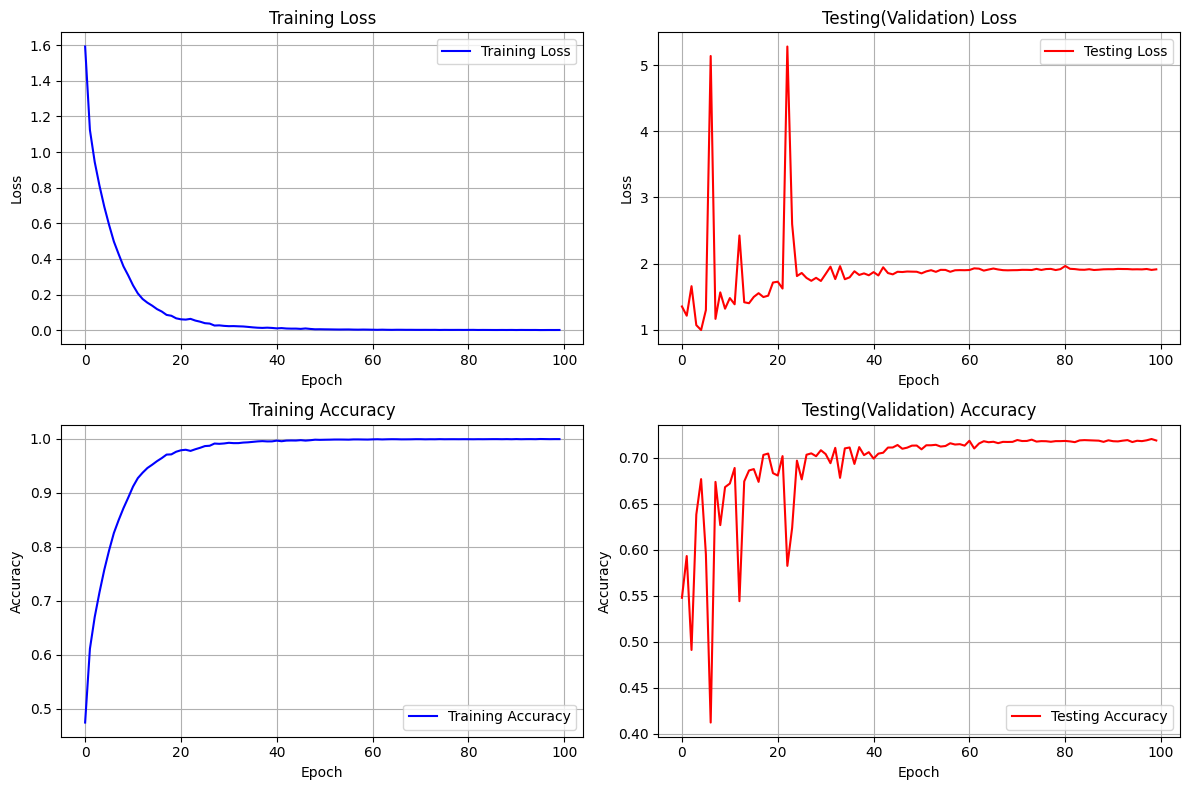

In [ ]:
training_logs_graph(history)

In [ ]:
# Time tracking callback
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
        self.epoch_start_time = None

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()      # to track the start time of the epoch

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_start_time). # to track the end time of the epoch

In [ ]:
# Create the model
model = myModel()

# Compile the model
optimizer = SGD(learning_rate=0.1)                      #using SGD optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',   # loss is sparse categorical crossentropy
              metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = LearningRateScheduler(cosine_decay)

# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,208,650 (4.61 MB)

 Trainable params: 1,207,434 (4.61 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
# Loading and preprocessing CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the data (values between 0 and 1)
train_images = train_images.astype('float32') / 255.0    #train images normalization
test_images = test_images.astype('float32') / 255.0      #test images normalization

# Callback for tracking time
time_callback = TimeHistory()

# Start time for training
begin_time = time.time()

# Training the model with time tracking and learning rate scheduler
history = model.fit(train_images, train_labels,
                    epochs=100,
                    batch_size=32,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_scheduler, time_callback])

# Cumulative training time per epoch
cumulative_time = np.cumsum(time_callback.times)

# End time for training
end_time = time.time()

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4020 - loss: 1.9310 - val_accuracy: 0.5476 - val_loss: 1.3513 - learning_rate: 0.1000
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6046 - loss: 1.1533 - val_accuracy: 0.5930 - val_loss: 1.2115 - learning_rate: 0.1000
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6721 - loss: 0.9415 - val_accuracy: 0.4909 - val_loss: 1.6583 - learning_rate: 0.0999
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7164 - loss: 0.8083 - val_accuracy: 0.6381 - val_loss: 1.0687 - learning_rate: 0.0998
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7650 - loss: 0.6735 - val_accuracy: 0.6766 - val_loss: 0.9946 - learning_rate: 0.0996
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8078 - loss: 0.5564 - val_accuracy: 0.5950 - val_loss: 1.2967 - learning_rate: 0.0994
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8

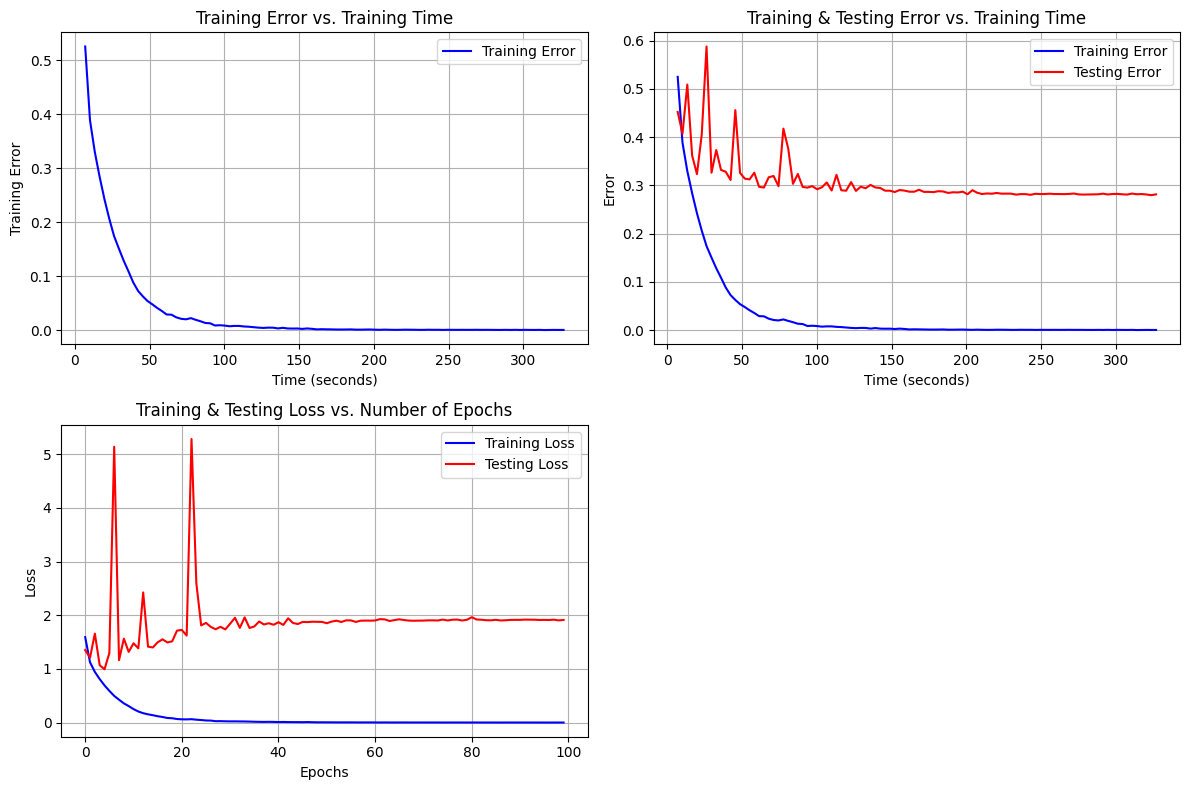

In [ ]:
plt.figure(figsize=(12, 8))

# Graph 1: Training Error(y-axis) vs. Training Time(x-axis)
train_error = 1 - np.array(history.history['accuracy'])
plt.subplot(2, 2, 1)
plt.plot(cumulative_time, train_error, label='Training Error', color='blue') #blue colored line
plt.title('Training Error vs. Training Time')                                # assigning title name
plt.xlabel('Time (seconds)')                                                 # assigning x-label name
plt.ylabel('Training Error')                                                 # assigning y-label name
plt.legend()
plt.grid(True)

# Graph 2: Training and Testing Error(y-axis) vs. Training Time(x-axis)
test_error = 1 - np.array(history.history['val_accuracy'])
plt.subplot(2, 2, 2)
plt.plot(cumulative_time, train_error, label='Training Error', color='blue')   #blue colored line
plt.plot(cumulative_time, test_error, label='Testing Error', color='red')      #red colored line
plt.title('Training & Testing Error vs. Training Time')                        # assigning title name
plt.xlabel('Time (seconds)')                                                   # assigning x-label name
plt.ylabel('Error')                                                            # assigning y-label name
plt.legend()
plt.grid(True)

# Graph 3: Training & Testing Loss vs. Number of Epochs
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Training Loss', color='blue')     #blue colored line
plt.plot(history.history['val_loss'], label='Testing Loss', color='red')   #red colored line
plt.title('Training & Testing Loss vs. Number of Epochs')                  # assigning title name
plt.xlabel('Epochs')                                                       # assigning x-label name
plt.ylabel('Loss')                                                         # assigning y-label name
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Final Training loss and Final Training Accuracy
training_loss = history.history['loss'][-1]  # Last epoch's training loss
training_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy

print(f"Final Training Loss: {training_loss:.4f}")
print(f"Final Training Accuracy: {training_accuracy:.4f}")

# Final Test Loss and Final Test Accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

print(f"Final Testing Loss: {test_loss:.4f}")
print(f"Final Testing Accuracy: {test_accuracy:.4f}")

train_time = end_time - begin_time # for model
print(f"Total training time: {train_time} seconds")

Final Training Loss: 0.0017
Final Training Accuracy: 0.9997
Final Testing Loss: 1.9130
Final Testing Accuracy: 0.7186
Total training time: 328.82123255729675 seconds
